In [1]:
words = open('/Users/zhenyabudnyk/PycharmProjects/KarpathySeries/names.txt', 'r').read().splitlines()
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [2]:
print(len(words))
min(len(w) for w in words)
max(len(w) for w in words)

32033


15

## Bigram char model
At bigram model we are working each time only with the 2 characters. What char follows "a"?



In [3]:
b = {}
for w in words:
    chs = ['<S>'] + list(w) + ['<E>'] # put the start and end token in bigram, that we can count what is the most popular start and end tokens too
    for ch1, ch2 in zip(chs, chs[1:]):
        bigram = (ch1, ch2)
        b[bigram] = b.get(bigram,0) + 1
        # print(ch1, ch2)

In [4]:
# here are the most popular bigrams
sorted(b.items(), key = lambda kv: kv[1])

[(('q', 'r'), 1),
 (('d', 'z'), 1),
 (('p', 'j'), 1),
 (('q', 'l'), 1),
 (('p', 'f'), 1),
 (('q', 'e'), 1),
 (('b', 'c'), 1),
 (('c', 'd'), 1),
 (('m', 'f'), 1),
 (('p', 'n'), 1),
 (('w', 'b'), 1),
 (('p', 'c'), 1),
 (('h', 'p'), 1),
 (('f', 'h'), 1),
 (('b', 'j'), 1),
 (('f', 'g'), 1),
 (('z', 'g'), 1),
 (('c', 'p'), 1),
 (('p', 'k'), 1),
 (('p', 'm'), 1),
 (('x', 'n'), 1),
 (('s', 'q'), 1),
 (('k', 'f'), 1),
 (('m', 'k'), 1),
 (('x', 'h'), 1),
 (('g', 'f'), 1),
 (('v', 'b'), 1),
 (('j', 'p'), 1),
 (('g', 'z'), 1),
 (('v', 'd'), 1),
 (('d', 'b'), 1),
 (('v', 'h'), 1),
 (('h', 'h'), 1),
 (('g', 'v'), 1),
 (('d', 'q'), 1),
 (('x', 'b'), 1),
 (('w', 'z'), 1),
 (('h', 'q'), 1),
 (('j', 'b'), 1),
 (('x', 'm'), 1),
 (('w', 'g'), 1),
 (('t', 'b'), 1),
 (('z', 'x'), 1),
 (('p', 'b'), 2),
 (('t', 'g'), 2),
 (('q', 's'), 2),
 (('t', 'x'), 2),
 (('f', 'k'), 2),
 (('b', 't'), 2),
 (('j', 'n'), 2),
 (('k', 'c'), 2),
 (('z', 'k'), 2),
 (('s', 'j'), 2),
 (('s', 'f'), 2),
 (('z', 'j'), 2),
 (('n', 'q

In [5]:
import torch

In [6]:
counts = torch.zeros((27,27), dtype=torch.int32)
#print(counts)
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)} # map the character to its index
stoi['.'] = 0
itos = {i:s for s, i in stoi.items()}

In [7]:

for w in words:
    chs = ['.'] + list(w) + ['.'] # put the start and end token in bigram, that we can count what is the most popular start and end tokens too
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        counts[ix1, ix2] += 1

In [8]:
#counts

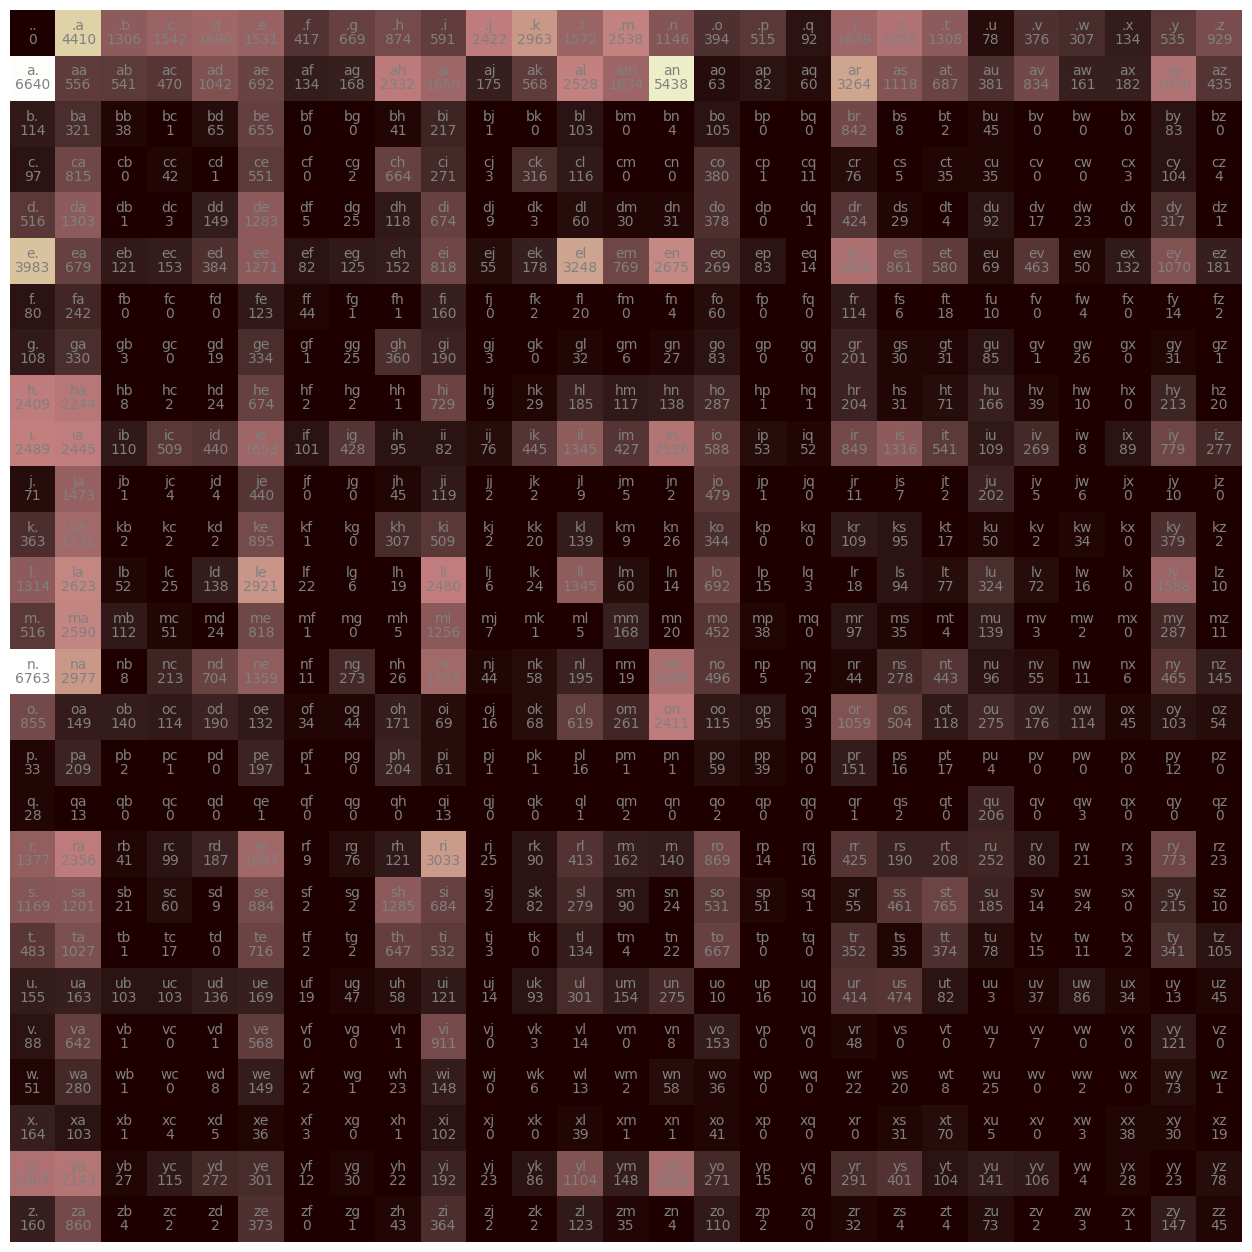

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(16,16))
plt.imshow(counts, cmap='pink')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, counts[i, j].item(), ha="center", va="top", color='gray')
plt.axis('off');

In [10]:
counts[0] # we take the first row

tensor([   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
        1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
         134,  535,  929], dtype=torch.int32)

In [11]:
p = counts[0].float() # probability vector

p = p/p.sum() # calculate the probability
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [12]:
g = torch.Generator().manual_seed(2147483647)
ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
ix
print(itos[ix])


j


In [13]:
g = torch.Generator().manual_seed(2147483647)
p = torch.rand(3, generator=g) # creates 3 random numbers, uses generator as a source of randomness
p = p/p.sum()
p

tensor([0.6064, 0.3033, 0.0903])

In [14]:
# torch.multinomial(p, num_samples=20, replacement=True, generator=g)
# here we generate a random sample of 0,1,2 with the probability taken from the


In [15]:
# we also want to make the matrix with normalized rows, that all cells in one row are summed up to 1
P = (counts+1).float()

P /= P.sum(1, keepdims=True) # p = 27 * 27, psum = 27 * 1
# so psum is a vector, aligned horizontally, when the division operation is happening, all columns in P are divided by the Psum
# hence the normalization happens


In [16]:

g = torch.Generator().manual_seed(2147483647)
for i in range(20):
    ix = 0
    out = []
    while True:
        p = P[ix]
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix ==0:
            break
    print(" ".join(out))




j u n i d e .
j a n a s a h .
p .
c o n y .
a .
n n .
k o h i n .
t o l i a n .
j u e e .
k s a h n a a u r a n i l e v i a s .
d e d a i n r w i e t a .
s s o n i e l y l a r t e .
f a v e u m e r i f o n t u m e .
p h y n s l e n a r u a n i .
c o r e .
y a e n o n .
k a .
j a b d i n e r i m i k i m a y n i n .
a n a a s n .
s s o r i o n s u s h .


## How to evaluate the quality of the model?
 we have 27 characters, and if every character is equally likely, then 4 percent (around it) is the probability
but if we see that we learned something with this model, the probability will be different from 4 percent
likelihood = product of all probabilities, it needs to be higher to show that the model is efficient
as all probabilities are quite small numbers, you need to use the log probability
log probabilities are returning 0 if the probability is 1 and down to -infinity if the probability is smaller
hence, the smaller is the probability - the smaller the logprob
log(a*b*c) = log(a) + log(b) + log(c)
so when all logprob are small, then the log_likelihood will be closer to zero, otherwise, it will be smaller and smaller
We don't like this, as we want to use loss function, that is looking for the lowest value
Hence, we use the negative log likelihood
Therefore, the bigger are the probabilities, the smaller will be NLL, and loss function will be looking exactly for that
Finally, we can normalize the loss function with the help of averaging the log likelihood, so we count each probability, and then the whole log likelihood is divided by amount of probabilities


## Goal is to...
Maximize the likelihood of the data w.r.t. model parameters (statistical modeling)
equivalent to maximizing the log likelihood (bcs log is monotonic)
equivalent to minimizing negative log likelihood (bcs log likelihood is negative, and loss function would be broken)
equivalent to minimizing the average negative log likelihood

In [17]:
log_likelihood = 0.0
n = 0
for w in words:
    chs = ['.'] + list(w) + ['.'] # put the start and end token in bigram, that we can count what is the most popular start and end tokens too
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        counts[ix1, ix2] += 1
        prob = P[ix1, ix2]
        n += 1
        logprob = torch.log(prob)
        log_likelihood+= logprob
        # print(f'{ch1}{ch2}: {prob: .4f} {logprob:.4f}') # prints the probability

# we have 27 characters, and if every character is equally likely, then 4 percent (around it) is the probability
# but if we see that we learned something with this model, the probability will be different from 4 percent
# likelihood = product of all probabilities, it needs to be higher to show that the model is efficient
# as all probabilities are quite small numbers, you need to use the log probability
# log probabilities are returning 0 if the probability is 1 and down to -infinity if the probability is smaller
# hence, the smaller is the probability - the smaller the logprob
print(f'{log_likelihood=}')
nll = - log_likelihood
print(f'{nll=}')
print(f'{nll/n}')

log_likelihood=tensor(-559951.5625)
nll=tensor(559951.5625)
2.4543561935424805


If you try andrejq - the likelihood will be negative infinity, because the jq is 0 probability, hence we can use model smoothing
Which basically means - adding a count of 1 to all probabilities
The more you add the more uniformed model you will have, so if you add 1000 - you will have more uniformed model

## Look at the Bigram Model through the Neural Network framework
Using the loss function and tuning


In [18]:
# create the training set of all of the bigrams
# x input
# y output
xs, ys = [], []

for w in words[:1]:
    chs = ['.'] + list(w) + [
        '.']  # put the start and end token in bigram, that we can count what is the most popular start and end tokens too
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)

# this way we can make the two lists, aka encoder and decoder
# so xs is the input, and the ys - is the desired output given the input
xs = torch.tensor(xs)
ys = torch.tensor(ys)

print(xs)
print(ys)

tensor([ 0,  5, 13, 13,  1])
tensor([ 5, 13, 13,  1,  0])


# how do we feed the examples in the neural network?
those are just indexes = integers, you can't input them into NN
The remedy - one-hot encoding, you take the integer 13 - have the vector of length 27, and then the value on 13 dimension in this vector is equal to 1

In [21]:
import torch.nn.functional as F
xenc = F.one_hot(xs, num_classes=27).float()

torch.Size([5, 27])


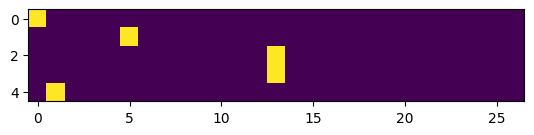

In [22]:
print(xenc.shape)
plt.imshow(xenc)
# we have 5 examples, hence 5 vectors of the lenght of 27
# when we look at the graph - we have each bit corresponding to the index of the letter, it is yellow, bcs it is equal to 1
# basically it is a graph vectore representation of the word emma

In [23]:
xenc.dtype

torch.float32

## Important - we don't want the input to be integers
For a neural network we want them to be a floating point numbers, that they can be adjusted and vary a lot, and that a tiny nudge
of one number can have an impact on the weights

In [27]:
W = torch.randn((27,27)) # these are random weight of the first neuron, they are from the Normal probability distribution
(xenc @ W)[3,13] # output here is 5 x 1


tensor(-0.5007)

# Why?
x encoding is 5 * 27, and multiply by 27 * 1, we multiply them and we have 5 * 1
We fed 5 inputs in the same neuron simultaneously

xenc @ W[3, 13] is saying us the firing rate of the 13th neuron on the 3rd element

In [28]:
# it is the same as
(xenc[3] * W[:, 13]).sum()

tensor(-0.5007)